# Load Package

In [205]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Load Dataset

Data Fields

datetime - hourly date + timestamp  

season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

holiday - whether 

the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

In [31]:
train = pd.read_csv("train.csv", parse_dates=["datetime"])
test = pd.read_csv("test.csv", parse_dates=["datetime"])

#### - Train Data has 10886 data  and 12 features
#### - Test Data has 6493data  9 features

In [32]:
print(train.shape)
print(test.shape)
print("train has {} data | test has {} data".format(train.shape[0], test.shape[0]))

(10886, 12)
(6493, 9)
train has 10886 data | test has 6493 data


In [33]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [34]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


#### Target Data -> count = casual + registered

# Explore Data

In [35]:
print("train has {} columns".format(len(train.columns)))
print("test has {} columns".format(len(test.columns)))
print("Target data is count")


train has 12 columns
test has 9 columns
Target data is count


### Unique data

In [36]:
# check unique data in train
for i in train.columns:
    print("{} has {} unique data".format(i, len(train[i].unique())))

datetime has 10886 unique data
season has 4 unique data
holiday has 2 unique data
workingday has 2 unique data
weather has 4 unique data
temp has 49 unique data
atemp has 60 unique data
humidity has 89 unique data
windspeed has 28 unique data
casual has 309 unique data
registered has 731 unique data
count has 822 unique data


In [37]:
# check unique data in test
for i in test.columns:
    print("{} has {} unique data".format(i, len(test[i].unique())))

datetime has 6493 unique data
season has 4 unique data
holiday has 2 unique data
workingday has 2 unique data
weather has 4 unique data
temp has 49 unique data
atemp has 65 unique data
humidity has 79 unique data
windspeed has 27 unique data


### Missing data

In [38]:
#check missing data in train
for i in train.columns:
    print("{0} has {1:.2f}% missing data".format(i, (len(train[train[i].isnull()]) / train.shape[0]) *100)) 

datetime has 0.00% missing data
season has 0.00% missing data
holiday has 0.00% missing data
workingday has 0.00% missing data
weather has 0.00% missing data
temp has 0.00% missing data
atemp has 0.00% missing data
humidity has 0.00% missing data
windspeed has 0.00% missing data
casual has 0.00% missing data
registered has 0.00% missing data
count has 0.00% missing data


In [39]:
#check missing data in train
for i in test.columns:
    print("{0} has {1:.2f}% missing data".format(i, (len(test[test[i].isnull()]) / test.shape[0]) *100)) 

datetime has 0.00% missing data
season has 0.00% missing data
holiday has 0.00% missing data
workingday has 0.00% missing data
weather has 0.00% missing data
temp has 0.00% missing data
atemp has 0.00% missing data
humidity has 0.00% missing data
windspeed has 0.00% missing data


### Define Data type

In [40]:
cat_data = ["season ","holiday ","workingday ","weather "]
num_data = ["datetime ","temp ","atemp","humidity ","windspeed "]

## Preprocessing

### Parse datetime

In [41]:
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second
train["datetime-dayofweek"] = train["datetime"].dt.dayofweek

print(train.shape)
train[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second", "datetime-dayofweek"]].head()

(10886, 19)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-01 00:00:00,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,2011,1,1,4,0,0,5


In [42]:
test["datetime-year"] = test["datetime"].dt.year
test["datetime-month"] = test["datetime"].dt.month
test["datetime-day"] = test["datetime"].dt.day
test["datetime-hour"] = test["datetime"].dt.hour
test["datetime-minute"] = test["datetime"].dt.minute
test["datetime-second"] = test["datetime"].dt.second
test["datetime-dayofweek"] = test["datetime"].dt.dayofweek

print(test.shape)
test[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second", "datetime-dayofweek"]].head()

(6493, 16)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-20 00:00:00,2011,1,20,0,0,0,3
1,2011-01-20 01:00:00,2011,1,20,1,0,0,3
2,2011-01-20 02:00:00,2011,1,20,2,0,0,3
3,2011-01-20 03:00:00,2011,1,20,3,0,0,3
4,2011-01-20 04:00:00,2011,1,20,4,0,0,3


In [44]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


# Explore corrleation between each feature and tarket label

### season

In [57]:
train.groupby("season").size().values

array([2686, 2733, 2733, 2734], dtype=int64)

In [76]:
grouped = train.groupby("season")["count"].aggregate({"sum_of_count":"sum"}).reset_index()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [77]:
grouped["count_of_season"] = train.groupby("season").size().values.reshape(-1,1)

In [79]:
grouped["Ratio"] = grouped["sum_of_count"] / grouped["count_of_season"]

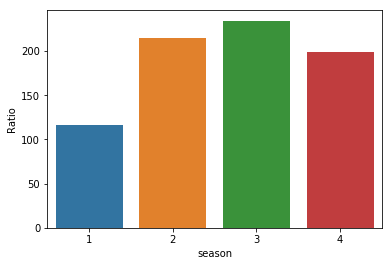

In [84]:
sns.barplot(grouped["season"],grouped["Ratio"])

#### Graph shows that volume of rental is high in fall and low in spring relatively

### holiday

In [89]:
grouped = train.groupby("holiday")["count"].aggregate({"sum_of_count":"sum"}).reset_index()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [91]:
grouped["count_of_holiday"] = train.groupby("holiday").size().values.reshape(-1,1)

In [94]:
grouped["Ratio"] = grouped["sum_of_count"] / grouped["count_of_holiday"]

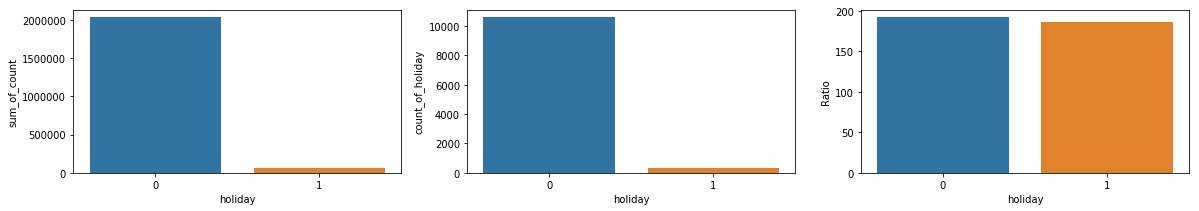

In [101]:
figure, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols =3)
figure.set_size_inches(20,3)
sns.barplot(grouped["holiday"],grouped["sum_of_count"],ax =ax1)
sns.barplot(grouped["holiday"],grouped["count_of_holiday"],ax = ax2)
sns.barplot(grouped["holiday"],grouped["Ratio"],ax = ax3)


#### Graphs show that there are no huge different between holiday or no but number of not holiday is overwhelmingly larger thatn holiday. so it is important feature

In [102]:
grouped = train.groupby("workingday")["count"].aggregate({"sum_of_count":"sum"}).reset_index()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [104]:
grouped["count_of_workingday"] = train.groupby("workingday").size().values.reshape(-1,1)

In [106]:
grouped["Ratio"] = grouped["sum_of_count"] / grouped["count_of_workingday"]

In [108]:
grouped.head()

,workingday,sum_of_count,count_of_workingday,Ratio
0,0,654872,3474,188.506621
1,1,1430604,7412,193.011873


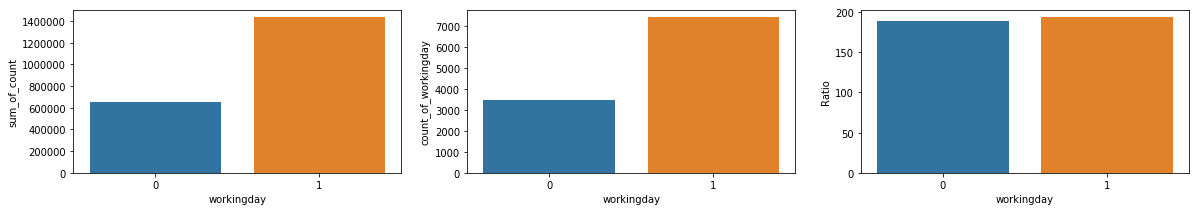

In [109]:
figure, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols =3)
figure.set_size_inches(20,3)
sns.barplot(grouped["workingday"],grouped["sum_of_count"],ax =ax1)
sns.barplot(grouped["workingday"],grouped["count_of_workingday"],ax = ax2)
sns.barplot(grouped["workingday"],grouped["Ratio"],ax = ax3)

#### Graphs show that there are no huge different between workingday or no but number of not workingday is overwhelmingly larger thatn not workingday. so it is important feature

### - corrleation between workingday and count

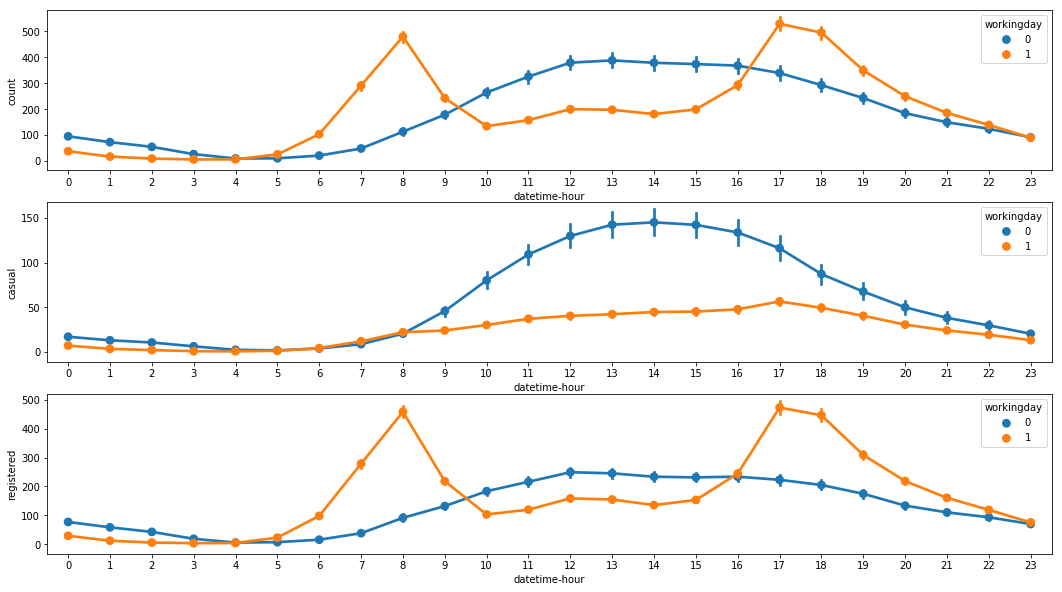

In [133]:
figure, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1)
figure.set_size_inches(18, 10)
sns.pointplot(train["datetime-hour"],train["count"], hue=train["workingday"], ax=ax1)
sns.pointplot(train["datetime-hour"], train["casual"], hue=train["workingday"], ax=ax2)
sns.pointplot(train["datetime-hour"], train["registered"], hue=train["workingday"], ax=ax3)

#### 그래프 해석
##### 1. workingday 때 출퇴근 시간에 자전거 대여량이 많다 특히 registed 고객(회원고객)이 많다.
##### 2. causal(비회원)고객의 경우 workingday가 아닐때 자전거 대여량이 많다.
#### -> insight: registered와 casual 고객을 구분하여 학습시킨다.

### weather

In [111]:
grouped = train.groupby("weather")["count"].aggregate({"sum_of_count":"sum"}).reset_index()
grouped

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,weather,sum_of_count
0,1,1476063
1,2,507160
2,3,102089
3,4,164


In [115]:
grouped["count_of_weather"] = train.groupby("weather").size().values.reshape(-1,1)
grouped["Ratio"] = grouped["sum_of_count"] / grouped["count_of_weather"]

In [116]:
grouped

,weather,sum_of_count,count_of_weather,Ratio
0,1,1476063,7192,205.236791
1,2,507160,2834,178.955540
2,3,102089,859,118.846333
3,4,164,1,164.000000


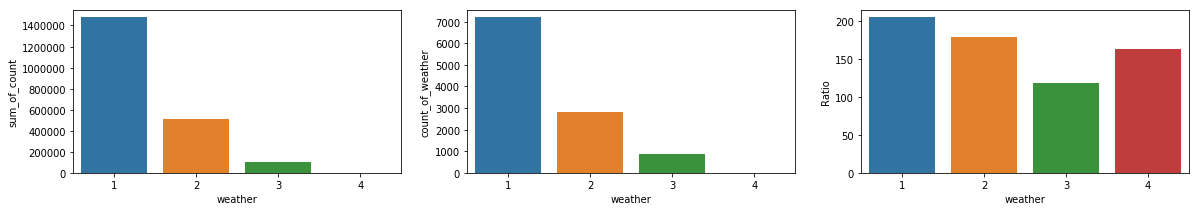

In [117]:
figure, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols =3)
figure.set_size_inches(20,3)
sns.barplot(grouped["weather"],grouped["sum_of_count"],ax =ax1)
sns.barplot(grouped["weather"],grouped["count_of_weather"],ax = ax2)
sns.barplot(grouped["weather"],grouped["Ratio"],ax = ax3)

##### Graphs show that weather influences number of count

### - Check difference between casual and registered

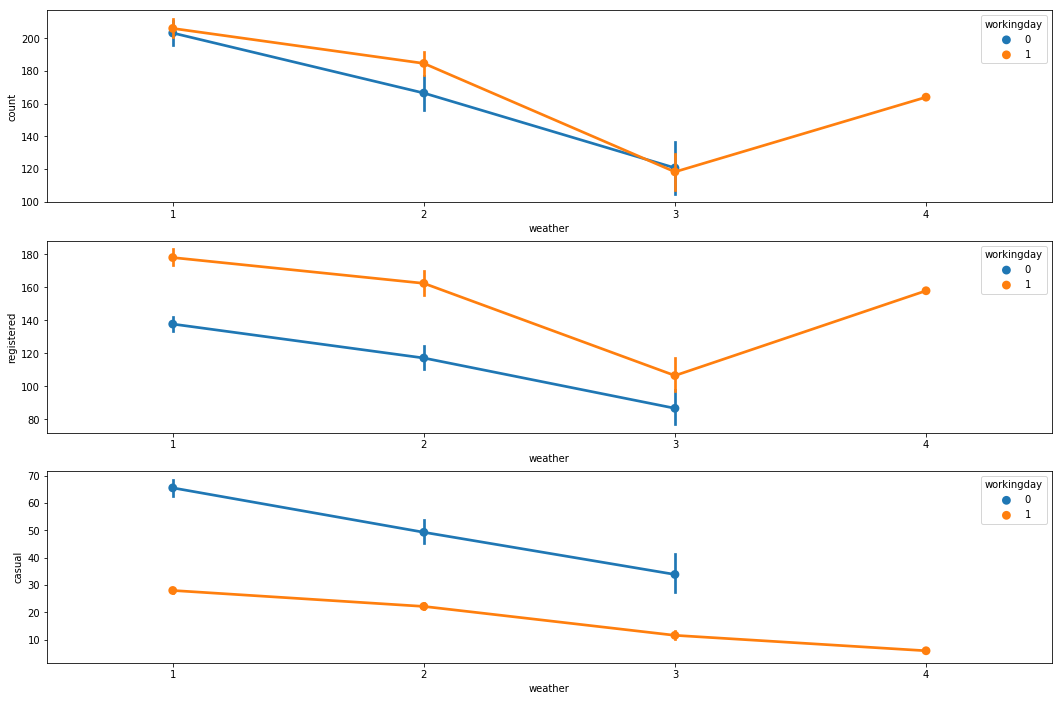

In [139]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)
figure.set_size_inches(18, 12)

sns.pointplot(train["weather"], train["count"], hue=train["workingday"], ax=ax1)
sns.pointplot(train["weather"], train["registered"], hue=train["workingday"], ax=ax2)
sns.pointplot(train["weather"], train["casual"], hue=train["workingday"], ax=ax3)




#### Graphs show that weather does not influence registered customers when working day 

#### but influences casual customers when not workingday

### datetime

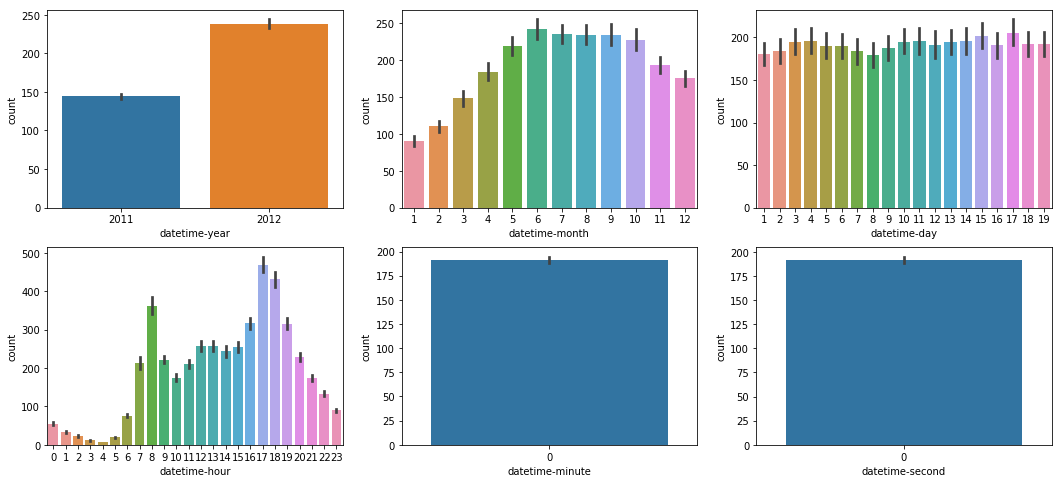

In [122]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 8)

sns.barplot(train["datetime-year"], train["count"], ax=ax1)
sns.barplot(train["datetime-month"], train["count"], ax=ax2)
sns.barplot(train["datetime-day"], train["count"], ax=ax3)
sns.barplot(train["datetime-hour"], train["count"], ax=ax4)
sns.barplot(train["datetime-minute"], train["count"], ax=ax5)
sns.barplot(train["datetime-second"], train["count"], ax=ax6)

In [124]:
train["datetime-year_month"] = train["datetime"].dt.year.astype('str') + '-'  + train["datetime"].dt.month.astype('str')
print(train.shape)
train[["datetime", "datetime-year_month"]].head()

(10886, 20)


,datetime,datetime-year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


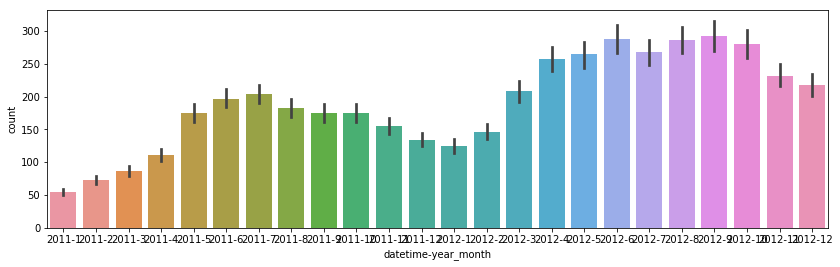

In [126]:
figure, ax = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(14, 4)

sns.barplot(train["datetime-year_month"], train["count"])

#### Graph shows growth of business

### temp and atemp

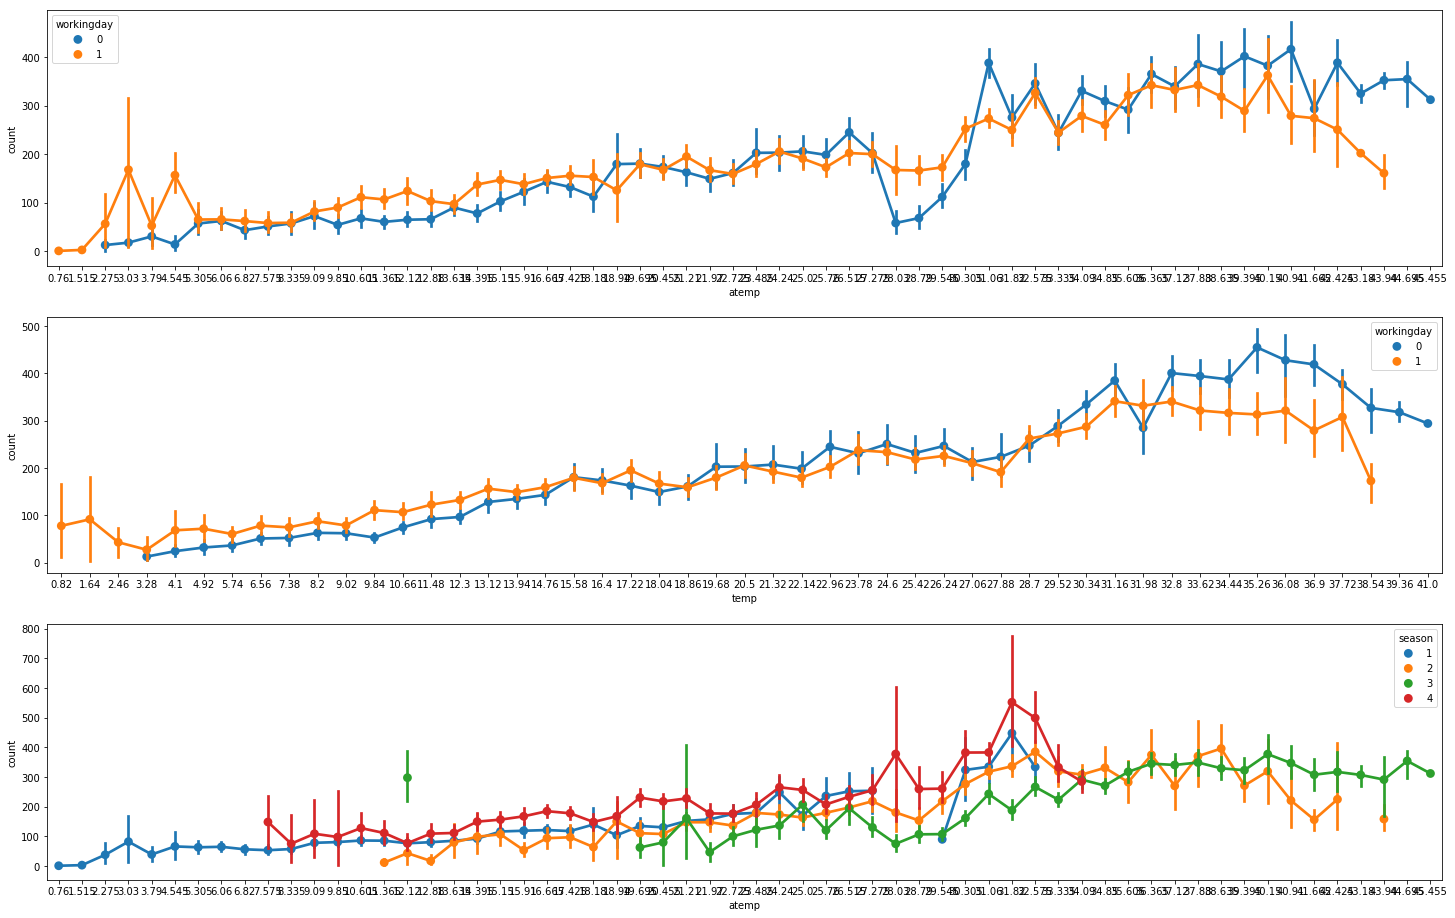

In [144]:
figure, (ax1, ax2,ax3) = plt.subplots(nrows=3, ncols=1)
figure.set_size_inches(25, 16)

sns.pointplot(train["atemp"], train["count"],hue = train["workingday"], ax=ax1)
sns.pointplot(train["temp"], train["count"], hue = train["workingday"], ax=ax2)
sns.pointplot(train["atemp"], train["count"], hue =train["season"],ax=ax3)

# sns.pointplot(data=train, x="atemp", y="count", ax=ax1)
# sns.pointplot(data=train, x="temp", y="count", ax=ax2)
# sns.pointplot(data=train, x="humidity", y="count", ax=ax3)
# sns.pointplot(data=train, x="windspeed", y="count", ax=ax4)


##### I can make hypothesis that if when temperature is too and working day, people would not use bike because they are easily sweat 

#### windseepd

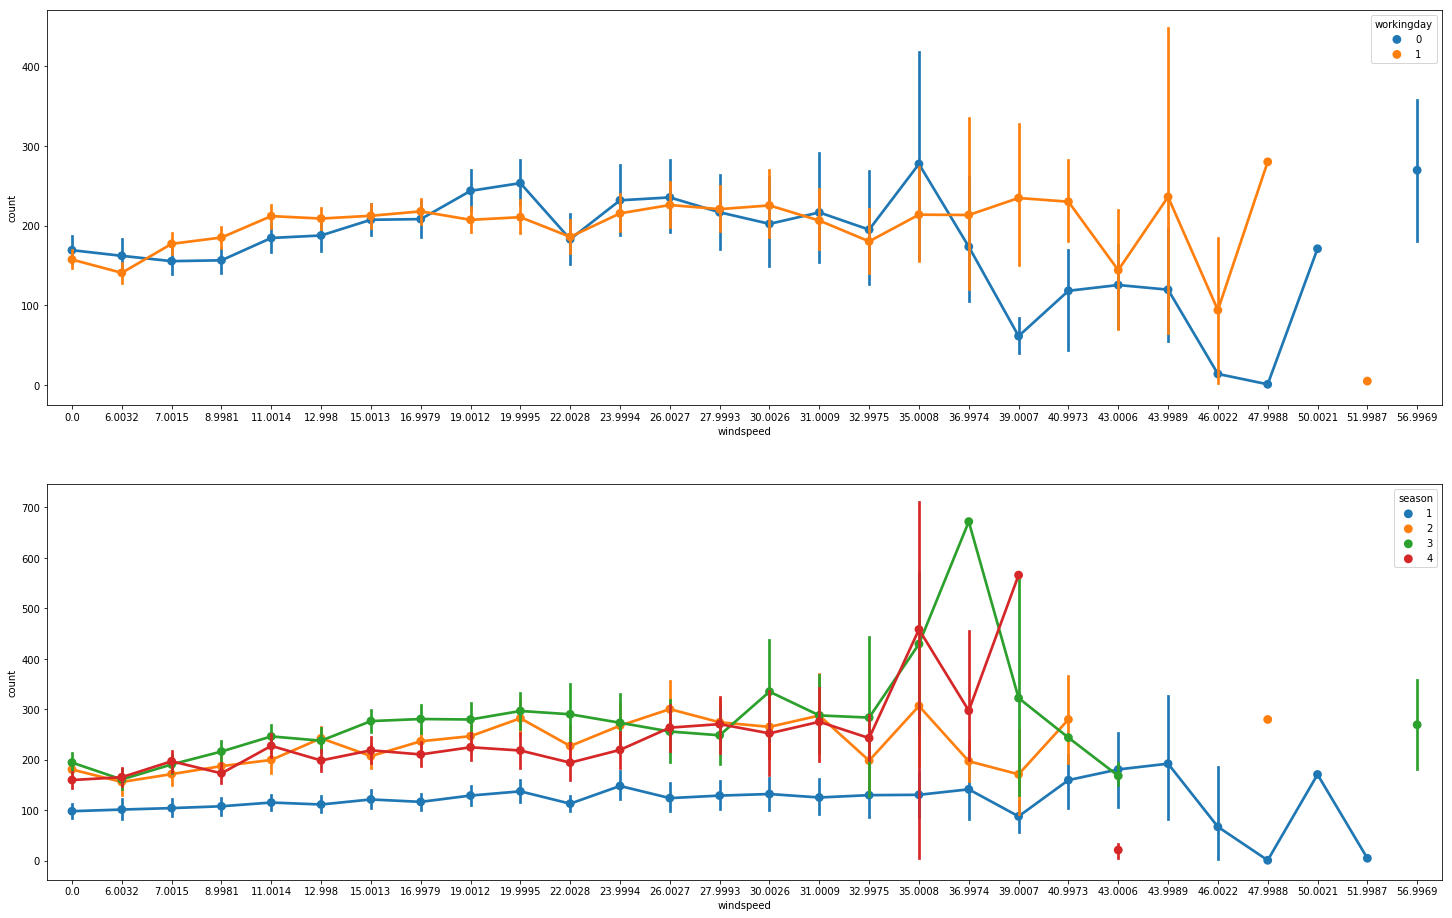

In [152]:
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(25, 16)

sns.pointplot(train["windspeed"], train["count"],hue = train["workingday"], ax=ax1)
sns.pointplot(train["windspeed"], train["count"],hue = train["season"], ax=ax2)

In [146]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek,datetime-year_month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5,2011-1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5,2011-1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5,2011-1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5,2011-1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5,2011-1


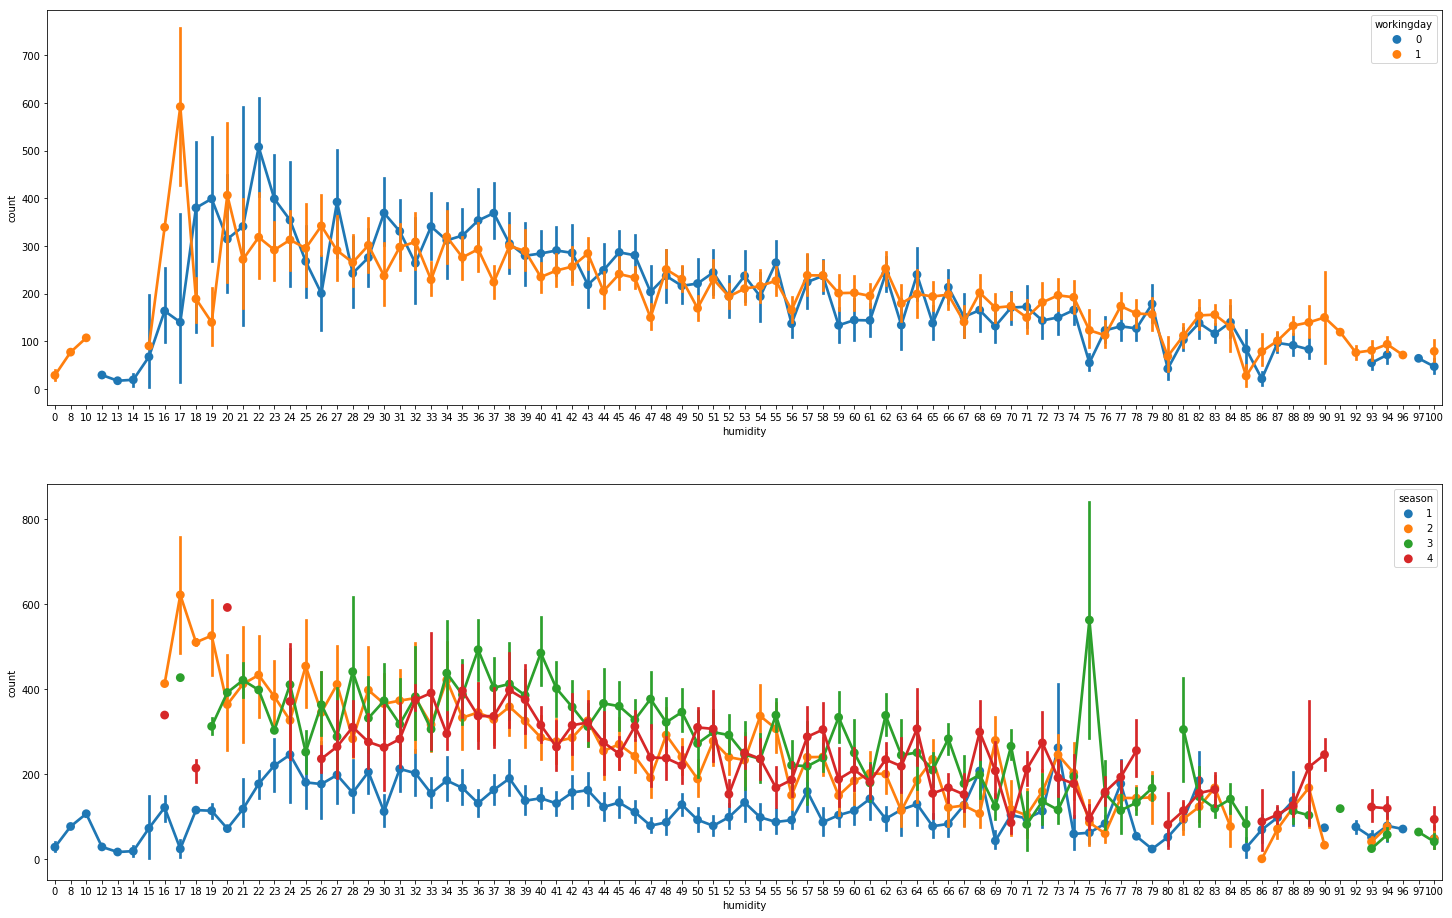

In [153]:
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(25, 16)

sns.pointplot(train["humidity"], train["count"],hue = train["workingday"], ax=ax1)
sns.pointplot(train["humidity"], train["count"],hue = train["season"], ax=ax2)

#### Graphs show that number of rental decreases when humidity is high

## Separate causal and registered

## Train(Causal)

In [329]:
feature_names = ["season", "holiday", "workingday",
                 "humidity", 
                 "datetime-month",  "datetime-hour"]

feature_names 

['season',
 'holiday',
 'workingday',
 'humidity',
 'datetime-month',
 'datetime-hour']

In [330]:
x_train = train[feature_names]

print(x_train.shape)
x_train.head()

(10886, 6)


,season,holiday,workingday,humidity,datetime-month,datetime-hour
0,1,0,0,81,1,0
1,1,0,0,80,1,1
2,1,0,0,80,1,2
3,1,0,0,75,1,3
4,1,0,0,75,1,4


In [331]:
x_test = test[feature_names]

print(x_test.shape)
x_test.head()

(6493, 6)


,season,holiday,workingday,humidity,datetime-month,datetime-hour
0,1,0,1,56,1,0
1,1,0,1,56,1,1
2,1,0,1,56,1,2
3,1,0,1,56,1,3
4,1,0,1,56,1,4


In [332]:
label_name = "casual"

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(10886,)


0    3
1    8
2    5
3    3
4    0
Name: casual, dtype: int64

In [333]:
y_train = np.log(y_train +1)

## Score(casual)

In [334]:
import numpy as np
from sklearn.metrics import make_scorer

def rmsle(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    
    log_predict = np.log(predict + 1)
    log_actual = np.log(actual + 1)
    
    difference = log_predict - log_actual
    difference = np.square(difference)
    mean_difference = difference.mean()
    
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [335]:
# from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score

score = cross_val_score(model, x_train, y_train,
                        cv=20, scoring=rmsle_scorer).mean()

print("Score = {0:.5f}".format(score))

Score = 0.27287


In [337]:
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [338]:
predictions = model.predict(x_test)

print(predictions.shape)
predictions[0:10]

(6493,)


array([ 0.20620695,  0.633723  ,  0.87496373,  0.07324082,  0.09241962,
        0.        ,  1.40702761,  0.96014895,  2.182013  ,  2.01597628])

In [339]:
predictions = np.exp(predictions) -1

In [340]:
predictions

array([ 0.22900753,  0.88461395,  1.39878829, ...,  6.34295921,
        6.62595949,  1.01511318])

In [341]:
casual = predictions

## Train(registered)

In [342]:
feature_names = ["season", "holiday", "workingday",
                 "humidity", 
                 "datetime-month",  "datetime-hour"]

feature_names 

['season',
 'holiday',
 'workingday',
 'humidity',
 'datetime-month',
 'datetime-hour']

In [343]:
x_train = train[feature_names]

print(x_train.shape)
x_train.head()

(10886, 6)


,season,holiday,workingday,humidity,datetime-month,datetime-hour
0,1,0,0,81,1,0
1,1,0,0,80,1,1
2,1,0,0,80,1,2
3,1,0,0,75,1,3
4,1,0,0,75,1,4


In [344]:
label_name = "registered"

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(10886,)


0    13
1    32
2    27
3    10
4     1
Name: registered, dtype: int64

In [345]:
y_train = np.log(y_train +1)

In [346]:
model = RandomForestRegressor(n_jobs=-1,n_estimators=30)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

## Score(registered)

In [347]:
import numpy as np
from sklearn.metrics import make_scorer

def rmsle(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    
    log_predict = np.log(predict + 1)
    log_actual = np.log(actual + 1)
    
    difference = log_predict - log_actual
    difference = np.square(difference)
    mean_difference = difference.mean()
    
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [348]:
# from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score

score = cross_val_score(model, x_train, y_train,
                        cv=20, scoring=rmsle_scorer).mean()

print("Score = {0:.5f}".format(score))

Score = 0.13437


In [349]:
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [350]:
predictions = model.predict(x_test)

print(predictions.shape)
predictions[0:10]

(6493,)


array([ 2.19688073,  1.74266874,  1.26583263,  1.42607423,  1.66497202,
        3.08312619,  4.39949358,  4.62243997,  5.90117255,  5.07376066])

In [351]:
predictions = np.exp(predictions) -1
predictions

array([   7.99690589,    4.71256845,    2.54604405, ...,  141.42553952,
        104.3877456 ,   49.52952929])

In [352]:
registered = predictions

# Add causal to registered

In [353]:
predictions = casual + registered
predictions[0:10]

array([   8.22591341,    5.5971824 ,    3.94483234,    3.23831638,
          4.38235034,   20.82652967,   83.49342975,  102.3540624 ,
        372.32987644,  165.28210796])

## Submit

In [354]:
submission = pd.read_csv("sampleSubmission.csv")

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [355]:
submission["count"] = predictions

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,8.225913
1,2011-01-20 01:00:00,5.597182
2,2011-01-20 02:00:00,3.944832
3,2011-01-20 03:00:00,3.238316
4,2011-01-20 04:00:00,4.382350


In [356]:
submission.to_csv("submit.csv", index=False)

In [357]:
submission

,datetime,count
0,2011-01-20 00:00:00,8.225913
1,2011-01-20 01:00:00,5.597182
2,2011-01-20 02:00:00,3.944832
3,2011-01-20 03:00:00,3.238316
4,2011-01-20 04:00:00,4.382350
5,2011-01-20 05:00:00,20.826530
6,2011-01-20 06:00:00,83.493430
7,2011-01-20 07:00:00,102.354062
8,2011-01-20 08:00:00,372.329876
9,2011-01-20 09:00:00,165.282108
